#Titanic Dataset Analysis

For this personal mini project, I will be analyzing the titanic dataset found on Kaggle.com.

Although this dataset was orginally meant for supervised learning purposes, I will be performing Data Exploration, Data Exploration, and Data Visulization tools to help understand the data present throughout this dataset.

Before we create example questions to ask ourselves, let us first figure out what type of data is present in this dataset.

In [1]:
#Impor necessary libraries

import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic = pd.read_csv("titanic.csv")
titanic.head(10)

#^^print out the first 10 rows of our data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


By importing the titanic dataset and printing out the first 10 rows of the dataset, we can now view what type of data is available in this set.

We have the passenger's name, sex, age, their class, which town they embarked from, the fare they paid, and if they survived or not.

---

With this information, I will try to answer these questions:
*   What is the age range of passengers on the ship?
*   Which towns did the passengers come from?
*   Did more females or males survive?
*   Did any passengers have family/relatives on the ship?


Let us explore the data more:

In [4]:
print(len(titanic))

891


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


According to the length of the dataset, there are 891 rows of information, so from analyzing the information of the dataset using the .info() function, we can see that the Cabin column has many NULL values, so we will need to be careful about that.

The Age column also has a significant amount of missing data as well.

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#What is the age range of passengers on the ship?

Using the .describe() function, we can get a better analysis of the data present in this large dataset.

One of the questions I wanted to answer before: "What is the age range of passengers on the ship?" can be asnwered using this chart.

The average age of people on the ship is around 29-30 years old with a Standard Deviation of about 14 - I would say this is a small standard deviation so the age's of the passengers are consistent with each other.

The minimum age (the youngest passenger) on the boat was 0.4 or 4 months old while the maximum age (the oldest passenger) was 80 years old.

Also while looking at the "Survived" column, a 1 in the column as an entry means that the passenger survived while a 0 as an entry means the passenger died. So, with this in mind, looking at the mean we can predict that about 38% of the passengers survived.

#Which towns did the passengers come from?

To answer this question, I will be using data visulization tools to help showcase this in a more appealing manner.

The Embarked column contains data regarding the ports the passengers departed from.

The ports of embarkation are labeled as C, Q, and S:


*   S = Southampton
*   C = Cherbourg
*   Q = Queenstown

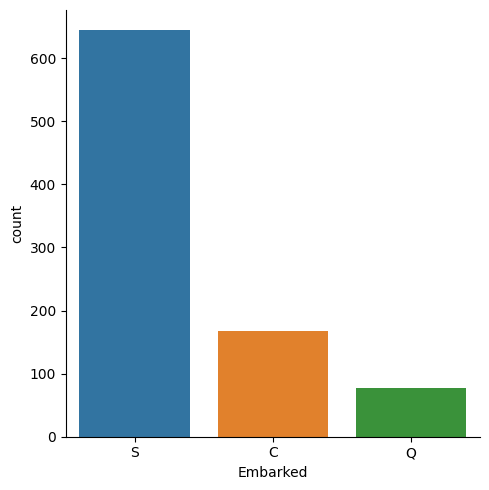

In [9]:
sns.catplot(x='Embarked', data=titanic, kind='count')

From this visulization, we can see that most of the passengers embarked from Southampton while very few embarked from Queenstown.

I also want to compare this with the classes of the passengers to see which town has the most Class 1, 2, or 3:

We can so this by adding a "hue" as the class column name where in this class will be "Pclass".

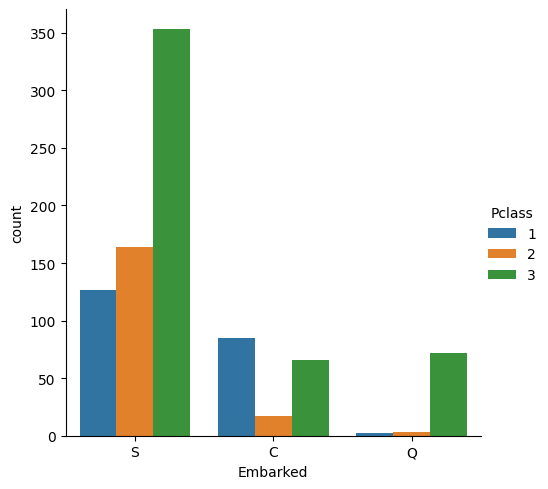

In [10]:
sns.catplot(x='Embarked',data=titanic,hue='Pclass',kind='count')

As most people embarked from Southampton, we can still see that in this chart too, however, more Class 3 passengers embarked from Southampton as well.

If we take a look at Queenstown, there were more Class 3 passengers embarking from there compared to Class 1 and 2.

#Did more females or males survive?

Now, I would like to see if more females or makes survived since if I remember correctly from the movie, women and children were the first priotity for being saved.

First, let us see the comparison between the total amount of females onboad compared to the total amount of males onboard:

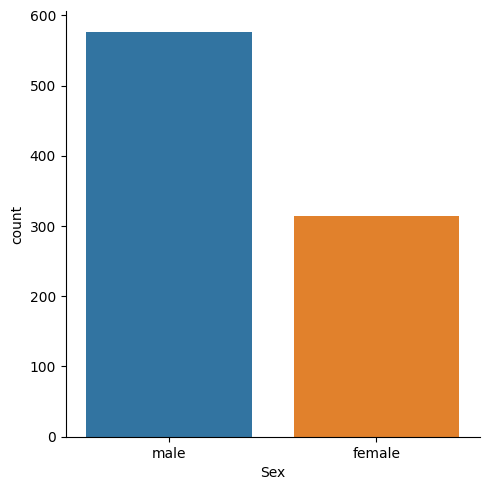

In [11]:
sns.catplot(x='Sex', data=titanic, kind='count')

From this visual, we can clearly see that there are more male present onboard. With this knowledge, let us see if more male or female survived the crash.

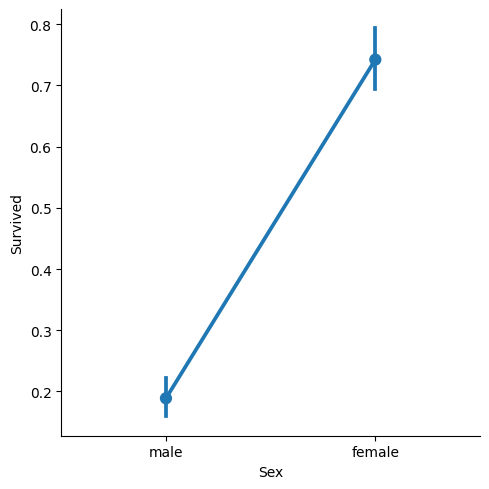

In [16]:
sns.catplot(x='Sex', y='Survived', data=titanic, kind='point')

From this plot, we can confirm that more females survived the crash than males since they were prioritized more.


#Did any passengers have family/relatives on the ship?

Let's now calculate if any passangers onboard had any relatives along with them.

First, let's analyze the data again.

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In this dataset we can see two columns titled "SibsSP" and "Parch" where "SibsSP" refers to the number of siblings or spouses the passenger had and "Parch" refers to the number of parents or children that passenger had.

Since we would like to know if that passenger had any family or relatives, with a simple "yes" or "no", we can create another column in the dataset to hold that value:

In [28]:
#Create a new column to indicate the number of family/relatives the passenger had onboard
titanic['Has_Family'] = titanic.SibSp + titanic.Parch

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has Someone,Has_Someone,Has_Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,No,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,No,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Yes,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,No,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Yes,0


By creating this new oclumn, we can now see the total number of family each passenger has onboad with them, 0 of course meaning they are alone and a number more than 0 means they have a family member with them.

Since now we identified the number of family members the passenger has, let us now clean up the data to a simple "Yes" or "No" to the question of if they have any family member with them.

In [30]:
titanic['Has_Family'].loc[titanic['Has_Family']>0] = 'No'

titanic['Has_Family'].loc[titanic['Has_Family']==0] = 'Yes'

<ipython-input-30-3375ddaac75e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Has_Family'].loc[titanic['Has_Family']>0] = 'No'


In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has Someone,Has_Someone,Has_Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,No,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,No,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Yes,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,No,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Yes,Yes


With this new attribute, we can now clearly tell if that passenger has a family member with them or not by changing the number values to "Yes" or "No".

To see this more visually and compare the amount of passengers that has family with them to if they don't have family with them, let us create a bar plot:

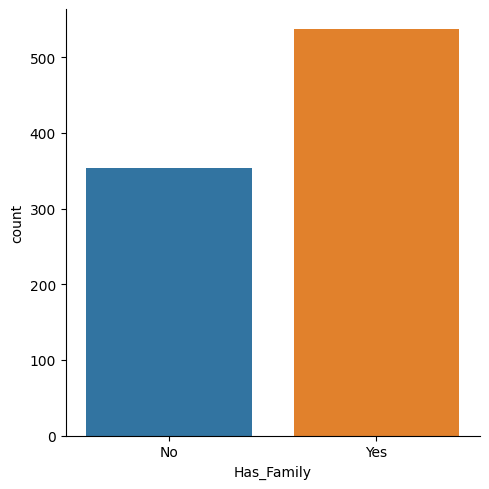

In [32]:
sns.catplot(x='Has_Family', data=titanic, kind='count')

From this visual representation of the data, we can confirm that more passengers did have family onboard with them.

By cleaning the data, it allowed us to easily show the comparison and digest the information.

*Thank you for viewing! I am still working on more with this dataset, so WIP :)*